In [1]:
####################################################################
# Example : Kalman Filter in 1D Time Sequence Data
# Author : Wang Kang
# Date : 2020/1/4
# Email : prince.love@live.cn
# References :
# https://zhuanlan.zhihu.com/p/45238681
# https://www.runoob.com/numpy/numpy-matrix.html
# https://www.zhihu.com/question/288946037
# https://blog.csdn.net/xguardian/article/details/81088499
####################################################################

In [32]:
import numpy.matlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [33]:
# Initialize estimated state mean vector and variance matrix (position and velocity: x, y, vx, vy)
x = np.matrix([1,1,0,0]).T
P = np.matlib.eye(4, 4)

# Increase variance of velocity because it is unknown (but position in known)
P[2,2] = P[3,3] = 100 

# Initialize process noise variance matrix
Q = 1e-4 * np.matlib.eye(4, 4)

# Initialize transition matrix
dt = 1/30 # 30 FPS
F = np.matlib.eye(4, 4)
F[0,2] = F[1,3] = dt 

In [34]:
# Initialize measurement matrix
H = np.matlib.eye(2, 4)

# Initialize measurement noise variance matrix
R = 1e-3 * np.matlib.eye(2, 2)

In [35]:
steps = 100
time_sequence = np.linspace(0,steps,steps)
predict_x = np.zeros(steps)
predict_y = np.zeros(steps)

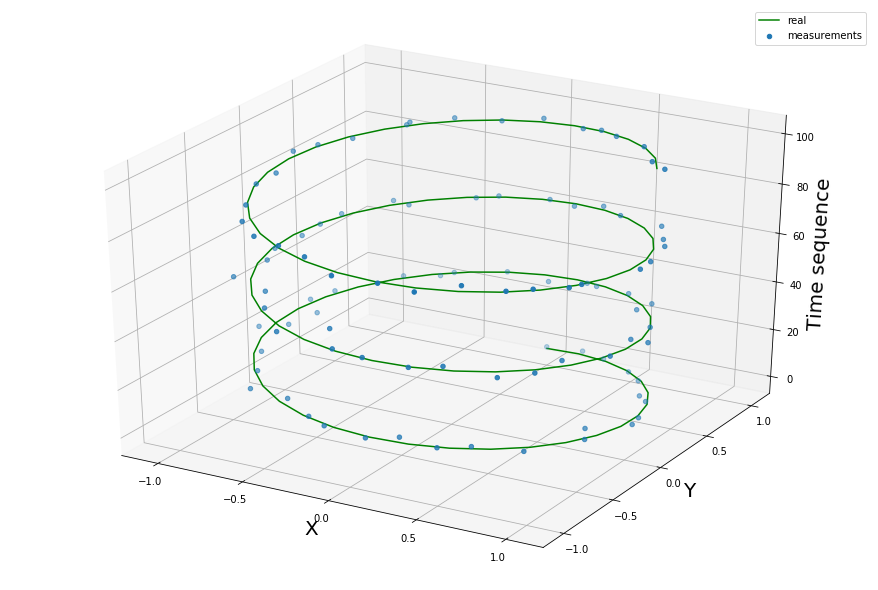

In [52]:
# Simulate 2D signal change in time sequence (Real states)
rx = np.sin(time_sequence/5)
ry = np.cos(time_sequence/5)

# Mix with noise to be measurement
zx = rx + np.random.normal(0, 0.05, steps)
zy = ry + np.random.normal(0, 0.05, steps)

# Plot real state and measurement
plt.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure()
axes3d = Axes3D(fig)
axes3d.plot(rx, ry, time_sequence, 'g', label='real')
axes3d.scatter(zx,zy,time_sequence, label='measurements')
plt.xlabel('X',size = 20)
plt.ylabel('Y',size = 20)
axes3d.set_zlabel('Time sequence',color = 'k',size=20)
plt.legend()

In [53]:
for t in range(0,steps):

    # Measurement
    zt = np.matrix([zx[t], zy[t]]).T
    
    
    # Prediction
    xt = F * x
    Pt = F * P * F.T + Q
    
    # Update
    K = Pt * H.T * np.linalg.inv(H * Pt * H.T + R)
    x = xt + K * (zt - H*xt)
    P = Pt - K * H * Pt

    # Record
    predict_x[t] = x[0]
    predict_y[t] = x[1]


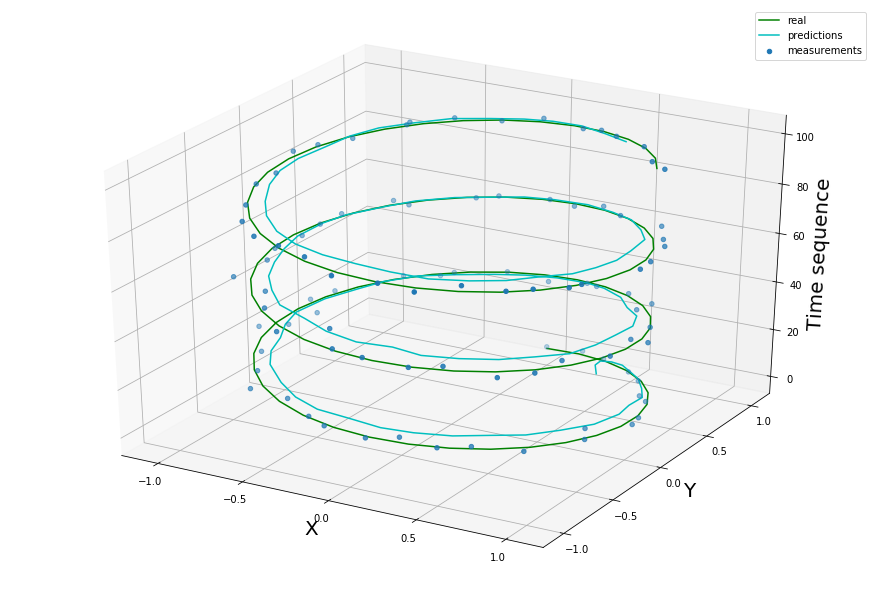

In [56]:
# Plot real state and measurement
plt.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure()
axes3d = Axes3D(fig)
axes3d.plot(rx, ry, time_sequence, 'g', label='real')
axes3d.scatter(zx,zy,time_sequence, label='measurements')
axes3d.plot(predict_x, predict_y, time_sequence, 'c', label='predictions')
plt.xlabel('X',size = 20)
plt.ylabel('Y',size = 20)
axes3d.set_zlabel('Time sequence',color = 'k',size=20)
plt.legend()